In order to begin simulating the movement of photons through a dust cloud we start with the toy model of photons 
We take $N$ upward moving photons starting at $z = 0$ the photons take steps of size $s = -\ln(1-\xi_1)$, where $\xi_x$ will be a random number drawn from a uniform distribution between 0 and 1.  After taking this step the particles scatter in a random direction.  We find this direction by $\cos(\theta) = \mu = 2\xi_2 - 1$ and $\phi = 2\pi\xi_3$.  The particle then takes a new step of a random size and the process repeats until the photon has either escaped the atmosphere by reaching a height of $z = \tau_{atm}$ or scatters below $z = 0$ where it is considered to be absorbed back into the emitting material.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def TakeStep(tau,mu,phi):
    # Travel some step size in the direction it was heading in.
    # tau = current position of the photon, stored as a numpy array [x,y,z].
    # mu = cos(theta), the cosine of the angle between the velocity vector of the photon and the z axis.
    # phi = the azimuthal angle of the photon's velocity.
    
    # calculate the step size before an interaction.
    step =  -np.log(1-np.random.rand())
    # tau[0] += mu*np.cos(phi)*step
    # tau[1] += mu*np.sin(phi)*step
    tau[2] += mu*step
    return tau 


def Scatter():
    # decide on a new random direction to scatter in.
    mu = 2*np.random.rand() - 1
    phi = 2*np.pi*np.random.rand()
    
    return mu, phi

In [3]:
# atmosphere depth, numpy array from 0 to 10 with N_atm evenly spaced samples
N_atm = 1000
tau_atm = np.logspace(-2,2,N_atm,base=10)
# tau_atm = np.array([0.01,0.03,0.1,0.3,1,3,10])

# The number of photons to simulate for each optical depth
N_photons = 1000

# # Number of bins in the mu and phi directions.
# # mu ranges from 0 to 1 and phi ranges from 0 to 2pi
# N_mu = 100
# N_phi = 100

# photons starts at z = 0, moving upward.
# Making space for the x and y coords even if not being used now.
tau_i = [0,0,0]
mu_i = 1
phi_i = 0

# Counter for the number of photons that get absorbed
N_absorbed = np.zeros_like(tau_atm)

In [4]:
# Loop over each atmospheric depth.  atm will be the atmospheric depth, atm_i is an iteration variable.
for atm_i,atm in enumerate(tau_atm):
    # Loop over each photon
    for phot_i in range(N_photons):
        # Set the initial conditions for the photons
        tau = tau_i[:]
        mu = mu_i
        phi = phi_i
        
        # Keep making steps until the photon is absorbed or transmitted.
        while 1:
            tau = TakeStep(tau,mu,phi)
           
            if tau[2] >= atm:
                break
            elif tau[2] < 0:
                N_absorbed[atm_i] += 1
                break
            
            # If the photon did not escape or get absorbed decide on a new scattering angle.
            mu,phi = Scatter()

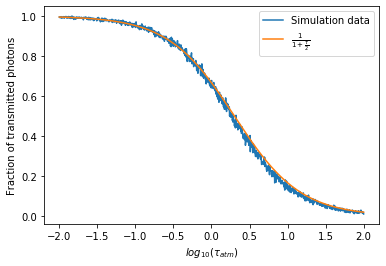

In [5]:
# Calculate the actual fraction transmitted and the theoretical line for comparison.
frac_transmitted = 1-N_absorbed/N_photons
theory = 1/(1+tau_atm/2)

# Plot data
plt.plot(np.log10(tau_atm), frac_transmitted, label="Simulation data")
plt.plot(np.log10(tau_atm),theory,label = r'$\frac{1}{1+\frac{\tau}{2}}$')
plt.legend()
plt.xlabel(r'$log_{10}(\tau_{atm})$')
plt.ylabel('Fraction of transmitted photons')
# plt.savefig('1D_Plot.png',dpi=200)